In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [2]:
df = pd.read_csv("df_final_bh_amazonas.csv")

In [3]:
df.head()

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,Thu,3,1,1,0,1,33.9,20.6,25.912500,89.0,32.0,30,0.0,NaN,68.0,NaN,82.0
1,2015-01-02,Fri,4,1,1,0,0,32.9,21.0,26.050000,87.0,38.0,43,0.0,NaN,79.0,NaN,83.0
2,2015-01-03,Sat,5,1,1,1,0,33.5,20.2,26.683333,83.0,38.0,23,0.0,NaN,44.0,NaN,83.0
3,2015-01-04,Sun,6,1,1,1,0,30.6,22.2,25.641667,81.0,43.0,20,0.0,NaN,49.0,NaN,82.0
4,2015-01-05,Mon,0,2,1,0,0,30.8,20.8,25.520833,79.0,36.0,51,0.0,NaN,59.0,NaN,82.0


In [4]:
df.count()

Date            1826
DayOfWeek       1826
DayOfWeekNum    1826
WeekOfYear      1826
Month           1826
IsWeekend       1826
IsHoliday       1826
temp_max        1826
temp_min        1826
temp_mean       1826
humidity_max    1826
humidity_min    1826
NUMBER_INT      1826
CO              1581
MP10            1457
O3              1265
MP2.5           1195
SO2             1091
dtype: int64

In [5]:
selected_cols_final = [
    'Date',
    'DayOfWeekNum',
    'WeekOfYear',
    # 'Month',
    # 'IsWeekend',
    'IsHoliday',
    'NUMBER_INT',
    'SO2',
    'temp_max',
    'temp_min',
    # 'temp_mean',
    'humidity_max',
]

df_final = df[selected_cols_final].copy()

In [6]:
# add lag
# df_final['SO2_lag1'] = df_final['SO2'].shift(1)
# df_final['SO2_lag2'] = df_final['SO2'].shift(2)
df_final['SO2_lag3'] = df_final['SO2'].shift(3)

# df_final['temp_min_lag1'] = df_final['temp_min'].shift(1)
# df_final['temp_min_lag2'] = df_final['temp_min'].shift(2)
df_final['temp_min_lag3'] = df_final['temp_min'].shift(3)

# df_final['humidity_max_lag1'] = df_final['humidity_max'].shift(1)
# df_final['humidity_max_lag2'] = df_final['humidity_max'].shift(2)
# df_final['humidity_max_lag3'] = df_final['humidity_max'].shift(3)

In [7]:
df_final = df_final.dropna()

In [8]:
# Check non-null counts and data types
df_final.info()

# Check descriptive statistics
df_final.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
Index: 1038 entries, 3 to 1620
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1038 non-null   object 
 1   DayOfWeekNum   1038 non-null   int64  
 2   WeekOfYear     1038 non-null   int64  
 3   IsHoliday      1038 non-null   int64  
 4   NUMBER_INT     1038 non-null   int64  
 5   SO2            1038 non-null   float64
 6   temp_max       1038 non-null   float64
 7   temp_min       1038 non-null   float64
 8   humidity_max   1038 non-null   float64
 9   SO2_lag3       1038 non-null   float64
 10  temp_min_lag3  1038 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 97.3+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,1038,1038,2019-06-09,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeekNum,1038.0,NaN,NaN,NaN,2.973025,2.009919,0.0,1.0,3.0,5.0,6.0
WeekOfYear,1038.0,NaN,NaN,NaN,26.617534,16.015517,1.0,13.0,25.0,42.0,53.0
IsHoliday,1038.0,NaN,NaN,NaN,0.029865,0.170297,0.0,0.0,0.0,0.0,1.0
NUMBER_INT,1038.0,NaN,NaN,NaN,46.926782,15.933578,11.0,35.0,45.0,58.0,91.0
SO2,1038.0,NaN,NaN,NaN,18.604046,16.848416,0.0,8.0,12.0,24.0,82.0
temp_max,1038.0,NaN,NaN,NaN,28.418401,2.911792,17.8,26.7,28.7,30.5,36.1
temp_min,1038.0,NaN,NaN,NaN,18.093834,2.568953,7.7,16.6,18.7,19.8,23.6
humidity_max,1038.0,NaN,NaN,NaN,83.020231,8.875577,51.0,77.0,85.0,91.0,94.0
SO2_lag3,1038.0,NaN,NaN,NaN,18.462428,16.844631,0.0,8.0,12.0,24.0,83.0


In [9]:
df_final.dtypes

Date              object
DayOfWeekNum       int64
WeekOfYear         int64
IsHoliday          int64
NUMBER_INT         int64
SO2              float64
temp_max         float64
temp_min         float64
humidity_max     float64
SO2_lag3         float64
temp_min_lag3    float64
dtype: object

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [11]:
# --- Metrics ---
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


In [12]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final = df_final.sort_values(by='Date')

# Range for training and testing (4 years for training, 1 year for validation)
min_year = df_final['Date'].dt.year.min()
train_mask = df_final['Date'].dt.year < (min_year + 4)
val_mask = df_final['Date'].dt.year == (min_year + 4)

df_train = df_final[train_mask]
df_val = df_final[val_mask]

df_train = df_train.drop(columns=['Date'])
df_val = df_val.drop(columns=['Date'])

X = df_final.drop(columns=['Date', 'NUMBER_INT'])
y = df_final['NUMBER_INT']


X_train = df_train.drop(columns=['NUMBER_INT'])
y_train = df_train['NUMBER_INT']

X_val = df_val.drop(columns=['NUMBER_INT'])
y_val = df_val['NUMBER_INT']

In [13]:
df_train.head()

,DayOfWeekNum,WeekOfYear,IsHoliday,NUMBER_INT,SO2,temp_max,temp_min,humidity_max,SO2_lag3,temp_min_lag3
3,6,1,0,20,82.0,30.6,22.2,81.0,82.0,20.6
4,0,2,0,51,82.0,30.8,20.8,79.0,83.0,21.0
5,1,2,0,23,82.0,29.5,20.5,79.0,83.0,20.2
6,2,2,0,43,82.0,28.0,19.9,78.0,82.0,22.2
7,3,2,0,49,82.0,30.4,19.7,74.0,82.0,20.8


In [14]:
df_train.tail()

,DayOfWeekNum,WeekOfYear,IsHoliday,NUMBER_INT,SO2,temp_max,temp_min,humidity_max,SO2_lag3,temp_min_lag3
1456,3,52,0,60,14.0,24.8,18.8,92.0,14.0,18.5
1457,4,52,0,61,14.0,25.4,18.5,92.0,14.0,18.5
1458,5,52,0,30,14.0,27.5,17.7,92.0,14.0,18.6
1459,6,52,0,26,12.0,27.3,18.5,93.0,14.0,18.8
1460,0,1,0,61,14.0,25.9,19.2,92.0,14.0,18.5


In [15]:
df_val.head()

,DayOfWeekNum,WeekOfYear,IsHoliday,NUMBER_INT,SO2,temp_max,temp_min,humidity_max,SO2_lag3,temp_min_lag3
1461,1,1,1,44,16.0,27.9,19.2,92.0,14.0,17.7
1462,2,1,0,45,16.0,31.1,18.9,90.0,12.0,18.5
1463,3,1,0,28,16.0,30.7,20.4,88.0,14.0,19.2
1464,4,1,0,37,16.0,25.4,19.0,91.0,16.0,19.2
1465,5,1,0,36,22.0,30.1,18.6,91.0,16.0,18.9


In [16]:
df_val.tail()

,DayOfWeekNum,WeekOfYear,IsHoliday,NUMBER_INT,SO2,temp_max,temp_min,humidity_max,SO2_lag3,temp_min_lag3
1616,2,23,0,74,10.0,23.2,12.5,75.0,14.0,15.2
1617,3,23,0,55,10.0,22.9,12.1,84.0,10.0,16.2
1618,4,23,0,64,10.0,24.1,11.2,88.0,10.0,14.2
1619,5,23,0,48,10.0,23.6,11.6,86.0,10.0,12.5
1620,6,23,0,40,10.0,23.6,11.7,91.0,10.0,12.1


## Test (10x with cv)

In [17]:
results = []

In [18]:
param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [19]:
for i in range(10):

    grid_search = GridSearchCV(
        estimator=XGBRegressor(random_state=i),
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print("Best Hyperparameters:", grid_search.best_params_)
    print(f"Best R-squared: {grid_search.best_score_:.2f}")

    best_xgb_model = grid_search.best_estimator_
    y_pred = best_xgb_model.predict(X_val)

    # Metrics
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    mape_val = mape(y_val, y_pred)
    smape_val = smape(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    corr = np.corrcoef(y_val, y_pred)[0, 1]

    results.append({
        'run': i+1,
        'random_state': i,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape_val,
        'sMAPE': smape_val,
        'R2': r2,
        'Correlation': corr,
        'Best Params': grid_search.best_params_,
        'Best Cross-validated R-squared': grid_search.best_score_
    })



Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 80, 'subsample': 1.0}
Best R-squared: 0.51
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 160, 'subsample': 1.0}
Best R-squared: 0.51
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 140, 'subsample': 0.9}
Best R-squared: 0.51
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 80, 'subsample': 0.9}
Best R-squared: 0.52
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140, 'subsample': 1.0}
Best R-squared: 0.50
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140, 'subsample': 1.0}
Best R-squared: 0.52
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 80, 'subsample': 0.9}
Be

In [20]:
# Show results
results_df = pd.DataFrame(results)
results_df

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Params,Best Cross-validated R-squared
0,1,0,113.027061,10.631419,8.269307,15.759258,17.022241,0.570458,0.831764,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.513883
1,2,1,114.163185,10.684717,8.416201,16.106235,17.447146,0.566140,0.833434,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.512180
2,3,2,128.681259,11.343776,9.010191,17.501683,19.384204,0.510966,0.827782,"{'colsample_bytree': 1.0, 'learning_rate': 0.2...",0.514781
3,4,3,118.896683,10.903976,8.658984,16.719635,18.285402,0.548151,0.832515,"{'colsample_bytree': 1.0, 'learning_rate': 0.2...",0.520437
4,5,4,117.718193,10.849802,8.598924,16.489025,17.927396,0.552630,0.832013,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.504370
5,6,5,115.376472,10.741344,8.483109,16.252843,17.584477,0.561529,0.830796,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.518119
6,7,6,115.273155,10.736534,8.414396,16.213302,17.566032,0.561922,0.830684,"{'colsample_bytree': 1.0, 'learning_rate': 0.2...",0.512432
7,8,7,111.044594,10.537770,8.190857,15.458989,16.577983,0.577992,0.836928,"{'colsample_bytree': 1.0, 'learning_rate': 0.2...",0.512892
8,9,8,114.019508,10.677992,8.354376,16.099960,17.398278,0.566686,0.829185,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.513279
9,10,9,113.665047,10.661381,8.367134,15.939384,17.272537,0.568033,0.835170,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.515938


In [21]:
## Aggregate Results
print(results_df.describe())

            run  random_state         MSE       RMSE        MAE       MAPE  \
count  10.00000      10.00000   10.000000  10.000000  10.000000  10.000000   
mean    5.50000       4.50000  116.186516  10.776871   8.476348  16.254031   
std     3.02765       3.02765    4.931409   0.225013   0.233820   0.562907   
min     1.00000       0.00000  111.044594  10.537770   8.190857  15.458989   
25%     3.25000       2.25000  113.753662  10.665534   8.357565  15.979528   
50%     5.50000       4.50000  114.718170  10.710626   8.415298  16.159768   
75%     7.75000       6.75000  117.132763  10.822687   8.569970  16.429979   
max    10.00000       9.00000  128.681259  11.343776   9.010191  17.501683   

           sMAPE         R2  Correlation  Best Cross-validated R-squared  
count  10.000000  10.000000    10.000000                       10.000000  
mean   17.646570   0.558451     0.832027                        0.513831  
std     0.766643   0.018741     0.002700                        0.004252

## Plots    

In [23]:
best_idx = results_df['RMSE'].idxmin()
print(f"Best run based on RMSE: Run {results_df.loc[best_idx, 'run']} with RMSE = {results_df.loc[best_idx, 'RMSE']:.2f}")

best_params = results_df.loc[best_idx, 'Best Params']
print(f"Best parameters: {best_params}")

best_random_state = results_df.loc[best_idx, 'run'] - 1 

# Rebuild the best model
best_model = XGBRegressor(random_state=best_random_state, **best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_val)


Best run based on RMSE: Run 8 with RMSE = 10.54
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 40, 'subsample': 0.9}


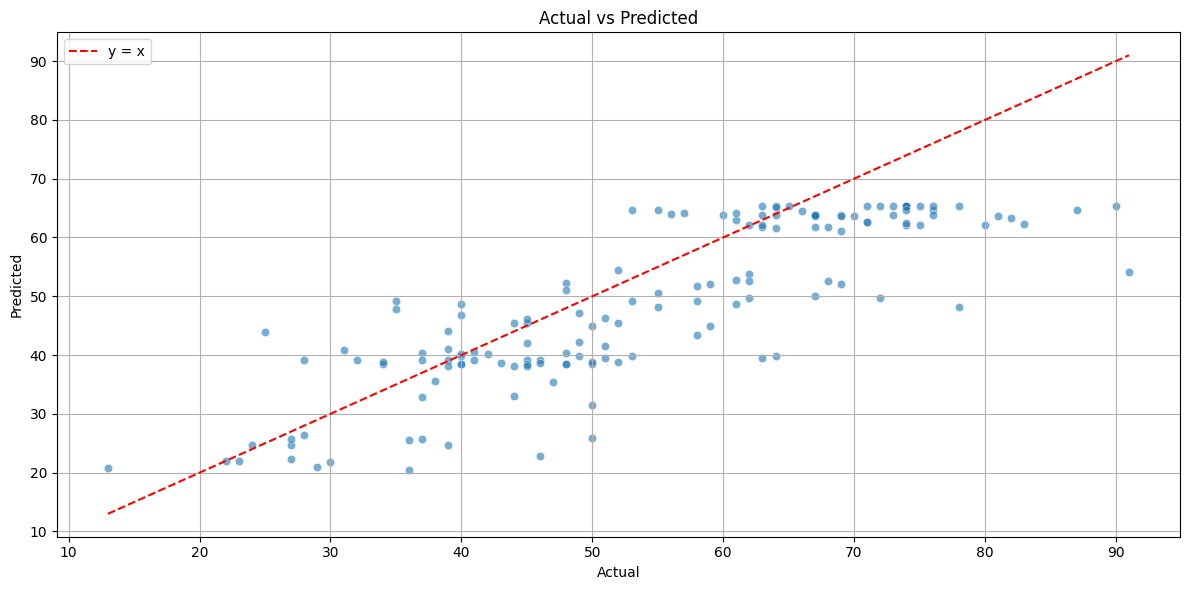

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val, y=y_pred_best, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

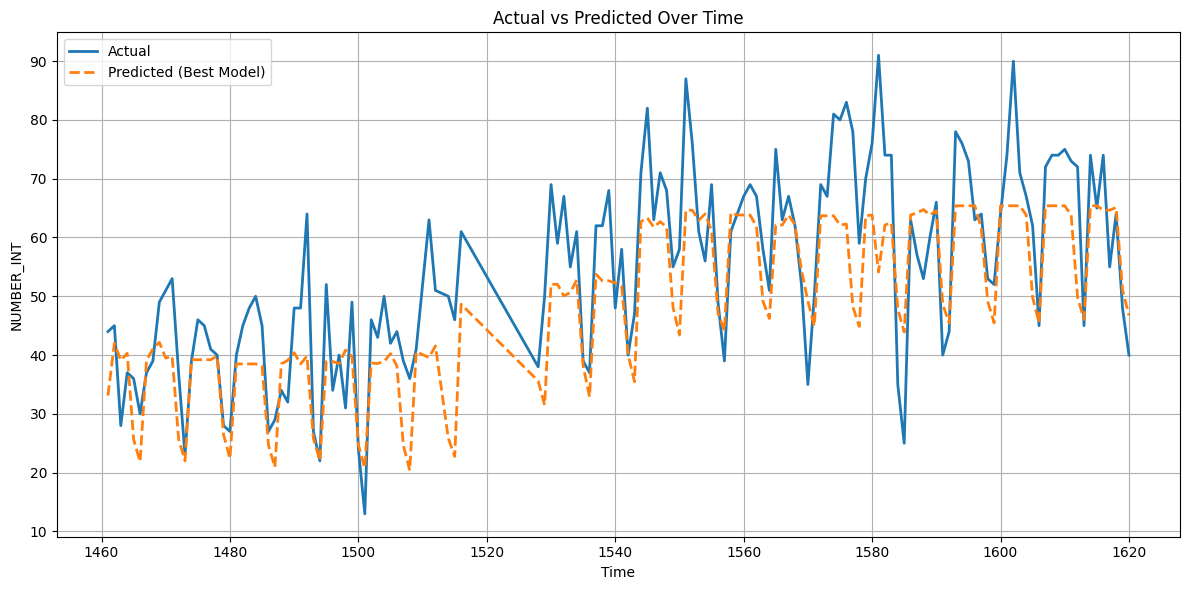

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val.values, label='Actual', linewidth=2)
plt.plot(y_val.index, y_pred_best, label='Predicted (Best Model)', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title(f'Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

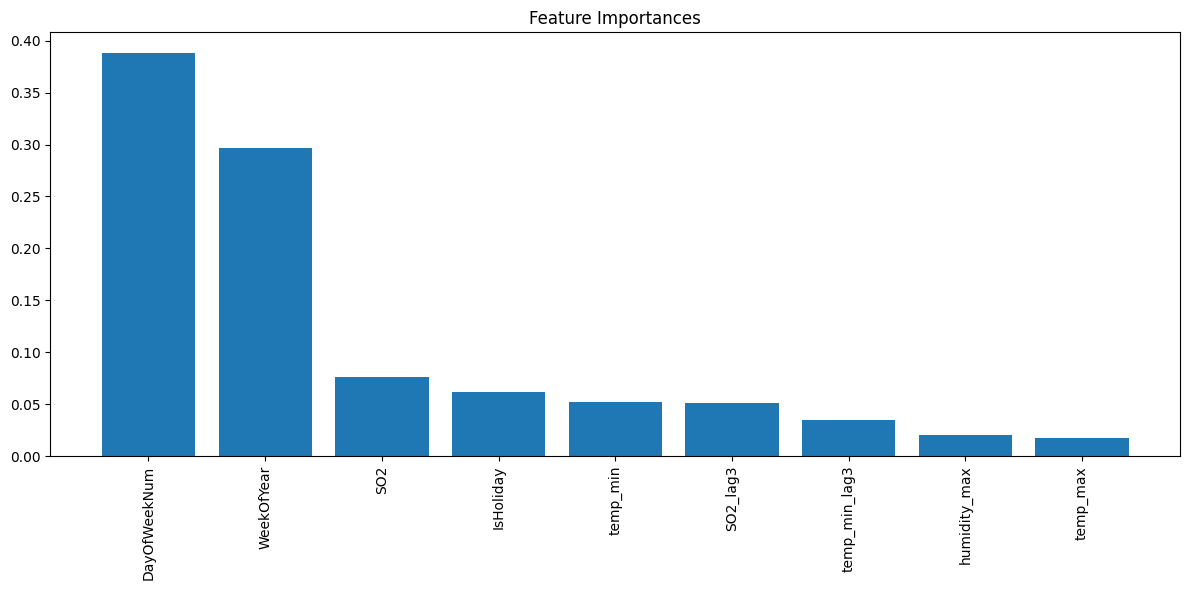

In [27]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()